In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn
import Plotting as plot
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from pandas import Series, DataFrame
# %matplotlib notebook
plt.style.use('ggplot')

Welcome to ROOTaaS 6.06/08


In [2]:

#---------------------------------------------------------------------
#TEST USING QUANTILE REGRESSION ON EB/EE DATA SEPARATELY AND UNIFIED AFTERWARDS, WITH AND WITHOUT WEIGHTS
#---------------------------------------------------------------------


In [3]:
# Upload Dataframes:
qr_data= quantileRegression("data")
qr_data.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_Check.h5", 0, -1)
dfdata= qr_data.getDF() 

Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_Check.h5
Selecting events   [ 0 ,  1999927 ]  out of  1999927
number of events: 1999927


In [4]:
def zeta(ScEta):
    rho=3.0
    theta=2*np.arctan(np.exp(-ScEta))
    return rho*np.cos(theta)
def x(phi):
    return rho*np.cos(phi)
def y(phi):
    return rho*np.sin(phi)

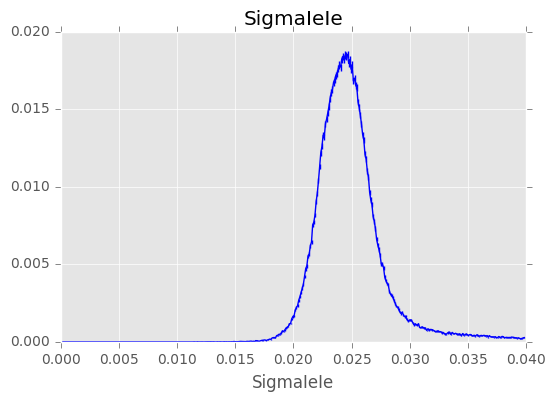

In [27]:
dfdataEE=dfdata.query("ScEta>1.4442 | ScEta<-1.4442")
dfdataEB=dfdata.query("ScEta>-1.57 & ScEta<1.57")
rv  = np.arange(0.0,0.04,0.0001)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("SigmaIeIe")
plot.plotHistErr(dfdataEE["SigmaIeIe"], rv, Color="b") 
#plot.plotHistErr(dfdataEB["SigmaIeIe"], rv, Color="r") 
ax.set_title("SigmaIeIe")

In [ ]:
dfdataCoda=dfdataEE.query("(SigmaIeIe>0.010 & SigmaIeIe<0.040)")


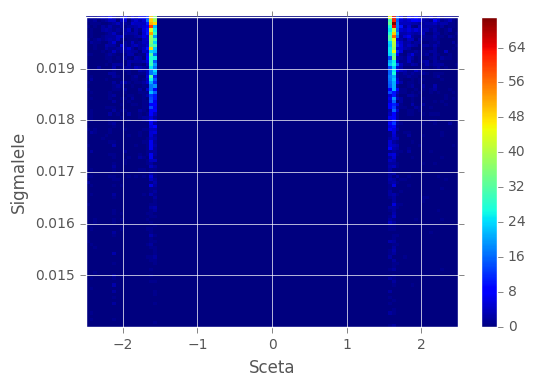

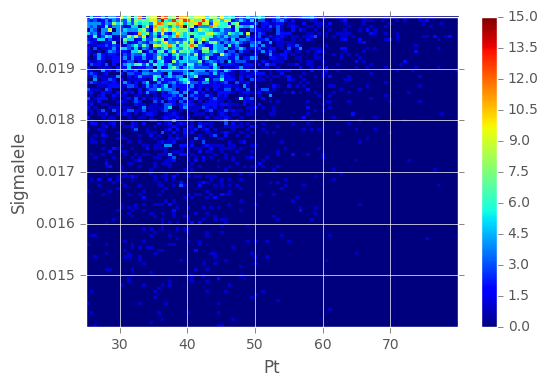

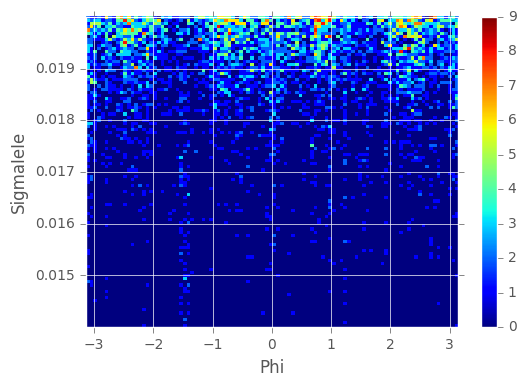

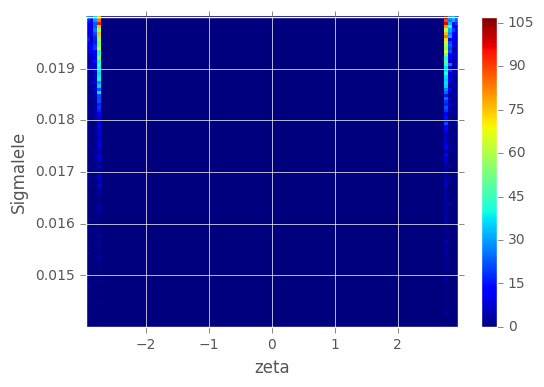

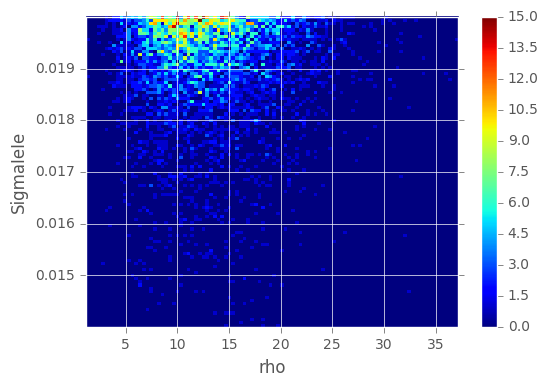

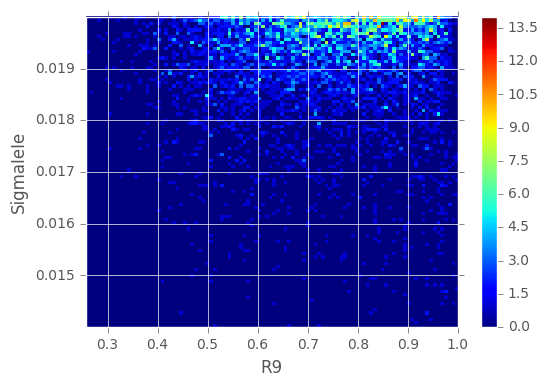

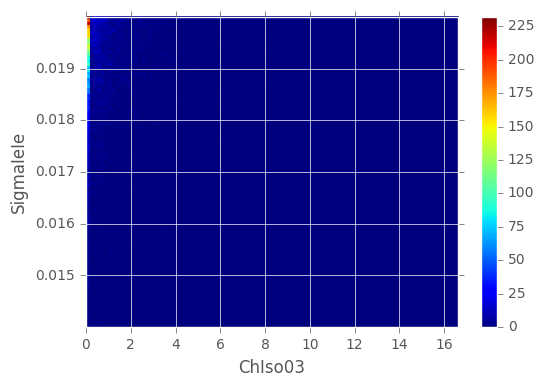

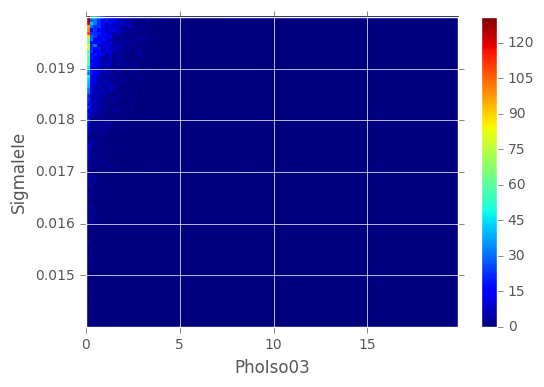

In [28]:
#vogliamo vedere la coda a 0.016
dfdataCoda=dfdata.query("(SigmaIeIe>0.014 & SigmaIeIe<0.020)")

dfdataCoda=dfdataCoda.query("ScEta>1.5 |ScEta<-1.5")

dfdataCoda=dfdataCoda.query("Pt<80")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Sceta")
ax.set_ylabel("SigmaIeIe")
plt.hist2d(dfdataCoda["ScEta"], dfdataCoda["SigmaIeIe"], bins=100)
plt.colorbar()
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Pt")
ax.set_ylabel("SigmaIeIe")
plt.hist2d(dfdataCoda["Pt"], dfdataCoda["SigmaIeIe"], bins=100)
plt.colorbar()
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Phi")
ax.set_ylabel("SigmaIeIe")
plt.hist2d(dfdataCoda["Phi"], dfdataCoda["SigmaIeIe"], bins=100)
plt.colorbar()
plt.show()
#change to coordinate cilindriche
#cylindrical coordinates:

dfdataCoda["zeta"]= zeta(dfdataCoda["ScEta"])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("zeta")
ax.set_ylabel("SigmaIeIe")
plt.hist2d(dfdataCoda["zeta"], dfdataCoda["SigmaIeIe"], bins=100)
plt.colorbar()
plt.show()
len(dfdata.query("Pt<30").index)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("rho")
ax.set_ylabel("SigmaIeIe")
plt.hist2d(dfdataCoda["rho"], dfdataCoda["SigmaIeIe"], bins=100)
plt.colorbar()
plt.show()
#wrt to other shape variables
dfdataCoda=dfdataCoda.query("R9<1.1")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("R9")
ax.set_ylabel("SigmaIeIe")
plt.hist2d(dfdataCoda["R9"], dfdataCoda["SigmaIeIe"], bins=100)
plt.colorbar()
plt.show()

dfdataCoda=dfdataCoda.query("ChIso03<20")

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("ChIso03")
ax.set_ylabel("SigmaIeIe")
plt.hist2d(dfdataCoda["ChIso03"], dfdataCoda["SigmaIeIe"], bins=100)
plt.colorbar()
plt.show()
dfdataCoda=dfdataCoda.query("PhoIso03<20")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("PhoIso03")
ax.set_ylabel("SigmaIeIe")
plt.hist2d(dfdataCoda["PhoIso03"], dfdataCoda["SigmaIeIe"], bins=100)
plt.colorbar()
plt.show()

In [6]:
qr_datav2= quantileRegression("data")
qr_datav2.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_v2.h5", 0, -1)
dfdatav2= qr_datav2.getDF() 

Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_data_v2.h5
Selecting events   [ 0 ,  4000000 ]  out of  4000000
number of events: 4000000


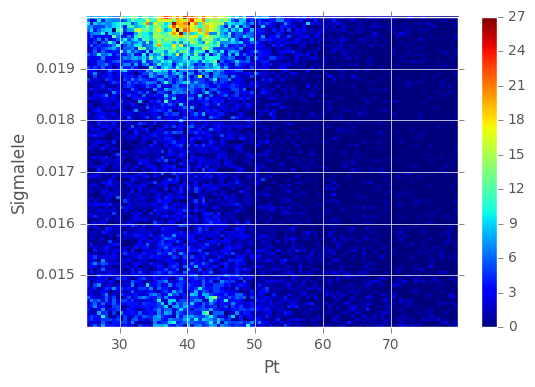

In [7]:
#vogliamo vedere la coda a 0.016
dfdataCodav2=dfdatav2.query("(SigmaIeIe>0.014 & SigmaIeIe<0.020)")
dfdataCodav2=dfdataCodav2.query("Pt<80")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Pt")
ax.set_ylabel("SigmaIeIe")
plt.hist2d(dfdataCodav2["Pt"], dfdataCodav2["SigmaIeIe"], bins=100)
plt.colorbar()
plt.show()
#change to coordinate cilindriche


In [8]:
qr_mc= quantileRegression("data")
qr_mc.loadDFh5("/mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Check.h5", 0, -1)
dfmc= qr_mc.getDF()

Loading dataframe from :  /mnt/t3nfs01/data01/shome/giulioisac/dataMC/MTR/df_mc_Check.h5
Selecting events   [ 0 ,  2000000 ]  out of  2000000
number of events: 2000000


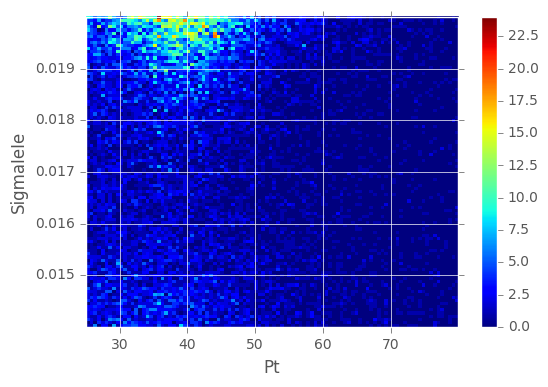

In [9]:
dfmcCoda=dfmc.query("(SigmaIeIe>0.014 & SigmaIeIe<0.020)")
dfmcCoda=dfmcCoda.query("Pt<80")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Pt")
ax.set_ylabel("SigmaIeIe")
plt.hist2d(dfmcCoda["Pt"], dfmcCoda["SigmaIeIe"], bins=100)
plt.colorbar()
plt.show()

171895

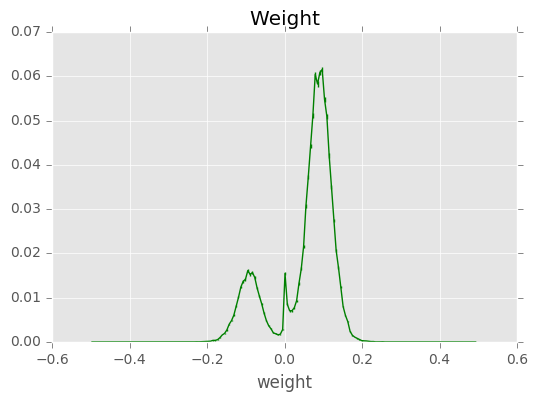

In [10]:
#v2 non ha low momentum photons
dfmcWeight=dfmc.query("Pt<30")
rv2= np.arange(-0.5,0.5,0.006)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("weight")
plot.plotHistErr(dfmcWeight["weight"], rv2, Color="g")
                 
ax.set_title('Weight')
len(dfmcWeight.index)

/mnt/t3nfs01/data01/swshare/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


EB Analysis


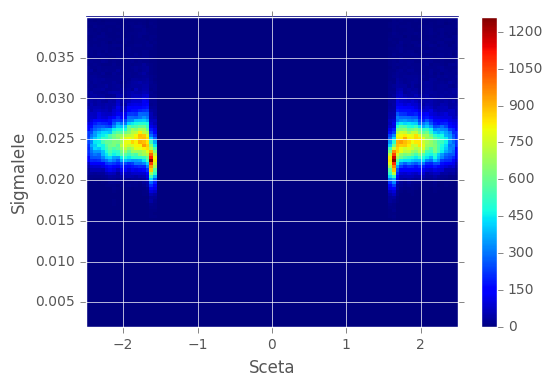

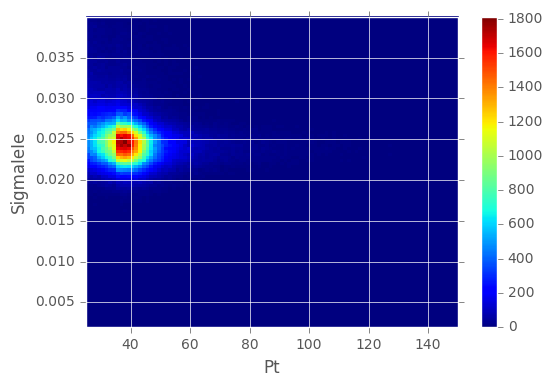

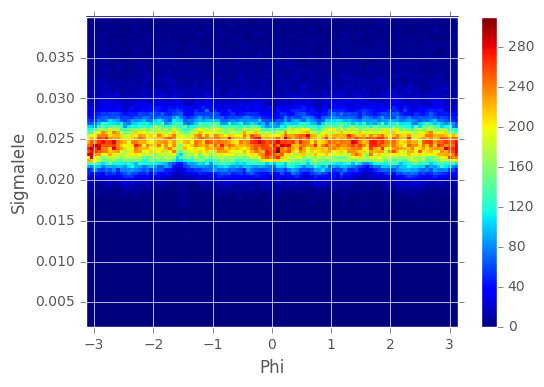

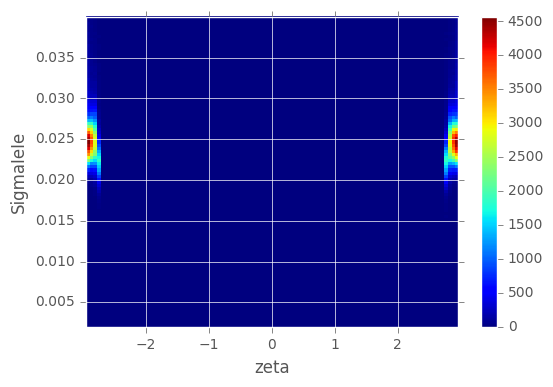

In [11]:
#EB/EE in range 0.0-0.04
dfdataCut=dfdata.query("SigmaIeIe<0.04")
dfdataCut["zeta"]= zeta(dfdataCut["ScEta"])

print "EB Analysis"
#dfdataE=dfdataE.query("Pt<80")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Sceta")
ax.set_ylabel("SigmaIeIe")
plt.hist2d(dfdataEB["ScEta"], dfdataEB["SigmaIeIe"], bins=100)
plt.colorbar()
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Pt")
ax.set_ylabel("SigmaIeIe")
plt.hist2d(dfdataEB["Pt"], dfdataEB["SigmaIeIe"], bins=100)
plt.colorbar()
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Phi")
ax.set_ylabel("SigmaIeIe")
plt.hist2d(dfdataEB["Phi"], dfdataEB["SigmaIeIe"], bins=100)
plt.colorbar()
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("zeta")
ax.set_ylabel("SigmaIeIe")
plt.hist2d(dfdataEB["zeta"], dfdataEB["SigmaIeIe"], bins=100)
plt.colorbar()
plt.show()

EE analysis


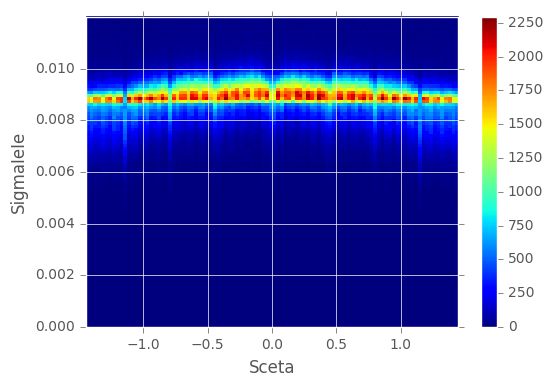

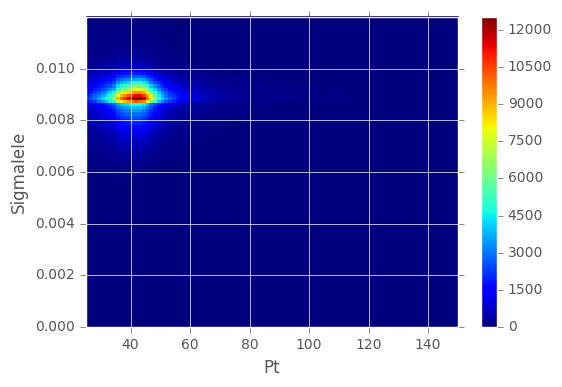

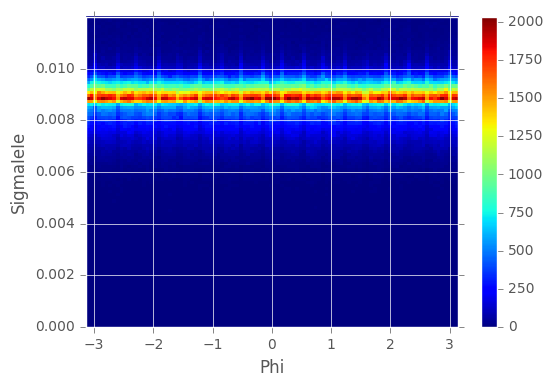

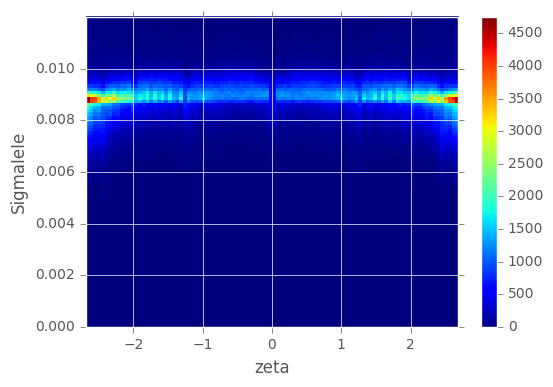

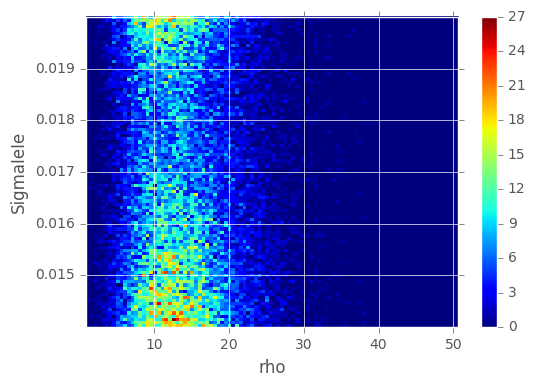

In [12]:
#EE plots
print "EE analysis"
dfdataEE=dfdataEE.query("SigmaIeIe<0.012")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Sceta")
ax.set_ylabel("SigmaIeIe")
plt.hist2d(dfdataEE["ScEta"], dfdataEE["SigmaIeIe"], bins=100)
plt.colorbar()
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Pt")
ax.set_ylabel("SigmaIeIe")
plt.hist2d(dfdataEE["Pt"], dfdataEE["SigmaIeIe"], bins=100)
plt.colorbar()
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Phi")
ax.set_ylabel("SigmaIeIe")
plt.hist2d(dfdataEE["Phi"], dfdataEE["SigmaIeIe"], bins=100)
plt.colorbar()
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("zeta")
ax.set_ylabel("SigmaIeIe")
plt.hist2d(dfdataEE["zeta"], dfdataEE["SigmaIeIe"], bins=100)
plt.colorbar()
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("rho")
ax.set_ylabel("SigmaIeIe")
plt.hist2d(dfdataCoda["rho"], dfdataCoda["SigmaIeIe"], bins=100)
plt.colorbar()
plt.show()

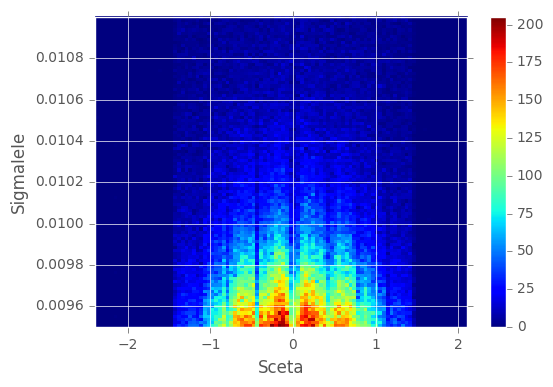

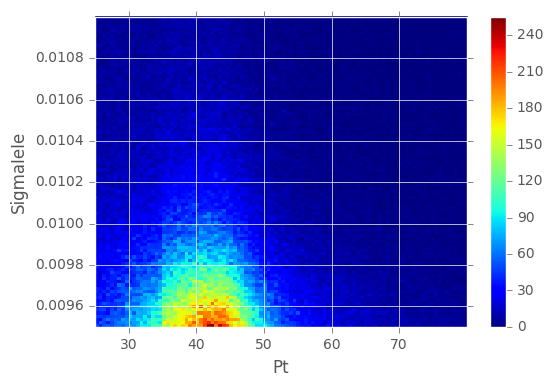

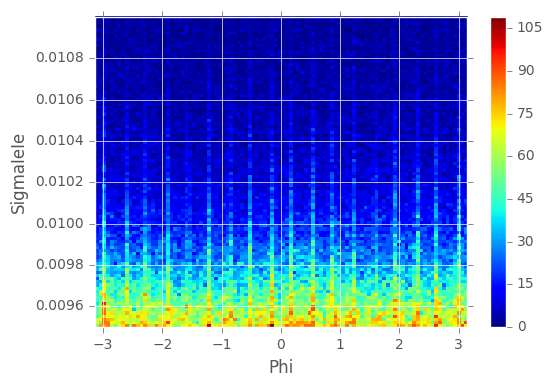

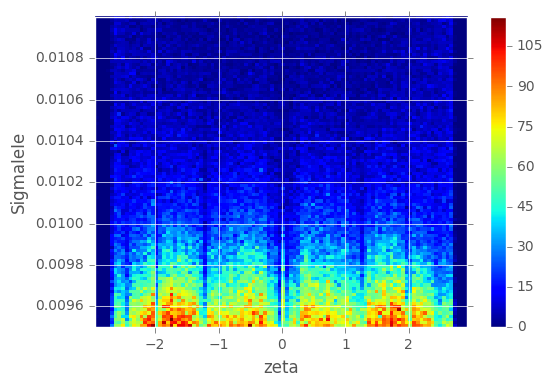

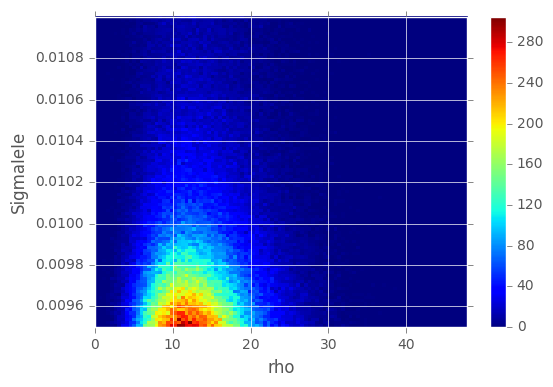

162726

In [13]:
#vogliamo vedere la coda a 0.01
dfdataCoda=dfdata.query("(SigmaIeIe>0.0095 & SigmaIeIe<0.011)")

#dfdataE=dfdata.query("ScEta>1.5 |ScEta<-1.5")

dfdataCoda=dfdataCoda.query("Pt<80")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Sceta")
ax.set_ylabel("SigmaIeIe")
plt.hist2d(dfdataCoda["ScEta"], dfdataCoda["SigmaIeIe"], bins=100)
plt.colorbar()
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Pt")
ax.set_ylabel("SigmaIeIe")
plt.hist2d(dfdataCoda["Pt"], dfdataCoda["SigmaIeIe"], bins=100)
plt.colorbar()
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Phi")
ax.set_ylabel("SigmaIeIe")
plt.hist2d(dfdataCoda["Phi"], dfdataCoda["SigmaIeIe"], bins=100)
plt.colorbar()
plt.show()
#change to coordinate cilindriche
#cylindrical coordinates:

dfdataCoda["zeta"]= zeta(dfdataCoda["ScEta"])
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("zeta")
ax.set_ylabel("SigmaIeIe")
plt.hist2d(dfdataCoda["zeta"], dfdataCoda["SigmaIeIe"], bins=100)
plt.colorbar()
plt.show()
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("rho")
ax.set_ylabel("SigmaIeIe")
plt.hist2d(dfdataCoda["rho"], dfdataCoda["SigmaIeIe"], bins=100)
plt.colorbar()
plt.show()
len(dfdata.query("Pt<30").index)